## Librerías a utilizar en el proyecto 

In [146]:
#Librerias para procesar datos
import pandas as pd
from datetime import datetime
import urllib.request
import numpy as np

# Librearías de gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
#Funciones 
def limpieza_datos(url_dataset:str, fila_final:int, columna_final:int):
    """ 
    Lee el excel y se encarga de extraer la información valiosa
    Parametros:
        url_dataset - text: dirección donde se encuentra en archivo con datos en github
        columna_final - int: la última columna que contiene datos en el archivo
        fila_final - int: la última fila que contiene datos en el archivo
    retorna: 
        DataFrame
    """ 
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan


def limpieza_datos_2023(url_dataset:str, fila_final:int, columna_final:int):
    """ 
    Lee el excel y se encarga de extraer la información valiosa
    Parametros:
        url_dataset - text: dirección donde se encuentra en archivo con datos en github
        columna_final - int: la última columna que contiene datos en el archivo
        fila_final - int: la última fila que contiene datos en el archivo
    retorna: 
        DataFrame
    """ 
    df = pd.read_excel(url_dataset)
    xdf = df.iloc[15:fila_final,2:columna_final]
    xdf.iloc[0,0] = "date"
    rows_with_nan = xdf[xdf.isna().any(axis=1)]
    if not(rows_with_nan.shape == (0,0)):
        xdf_sin_nan = xdf.dropna(how='all')
    xdf_sin_nan = xdf_sin_nan.dropna(axis=1)
    nuevos_nombres_columnas =  list(xdf_sin_nan.iloc[0])
    xdf_sin_nan.columns = nuevos_nombres_columnas
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    xdf_sin_nan = xdf_sin_nan.drop(0)
    xdf_sin_nan = xdf_sin_nan.reset_index(drop=True)
    return xdf_sin_nan
    
def convert_to_datetime(column):
    """
    Cambia el tipo de dato a datatime
    """
    formats = ['%Y-%m-%dT%H:%M:%S.%f', '%Y-%m-%dT%H:%M:%S,%f']
    for fmt in formats:
        try:
            return pd.to_datetime(column, format=fmt)
        except ValueError:
            continue
    raise ValueError(f"Time data '{column}' does not match any known formats")

In [148]:
url = "https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/utils/funciones.py"
nombre_archivo = "funciones.py"

urllib.request.urlretrieve(url, nombre_archivo)

('funciones.py', <http.client.HTTPMessage at 0x7b9a2281fc40>)

In [149]:
from funciones import multiple_plot, plot_roc_curve, tidy_corr_matrix, checkVIF

## Carga de los datos

In [150]:
#Enlaces de los archivos de energia_activa_2020 hasta 2024 y la información captada por sensores

urls_epm = {
    'energia_activa_2020':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20Activa%202020.xlsx',
    'energia_activa_2021':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202021.xlsx',
    'energia_activa_2022':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energia%20activa%202022.xlsx',
    'energia_activa_2023':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202023.xlsx',
    'energia_activa_2024':'https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202024.xlsx'
}

urls_sensores = {
    'iot_calderas'       :'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_calderas.csv',
    'iot_esterilizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_esterilizadores.csv',
    'iot_pasteurizadores':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_pasteurizadores.csv',
    'iot_power_meters':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_power_meters.csv',
    'iot_silos':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_silos.csv',
    'iot_yogurteras':'https://raw.githubusercontent.com/Causil/especializacion/main/monografia/momentos_evaluativos/Momento%203/datos_originales/auralac_iot_yogurteras.csv',
}

        Exploración inicial de los datos 

In [151]:
#Miramos la estructura inicial de un archivo
df_2023_epm = pd.read_excel('https://github.com/Causil/especializacion/raw/main/monografia/momentos_evaluativos/Momento%203/datos_originales/Energ%C3%ADa%20Activa%202023.xlsx').head()

In [152]:
df_2023_epm.info()
df_2023_epm.describe()
# Para poder tener una información y descripción clara de los datos necesitamos realizar una limpieza de los datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Columns: 109 entries,      Matriz Consumos de Energía Activa y Reactiva por Hora to Unnamed: 108
dtypes: float64(9), object(100)
memory usage: 4.4+ KB


,Matriz Consumos de Energía Activa y Reactiva por Hora,Unnamed: 1,Unnamed: 8,Unnamed: 12,Unnamed: 14,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cargamos los datos de los sensores

In [153]:
# Cargamos los datos de los sensores
df_iot_calderas        = pd.read_csv( urls_sensores['iot_calderas'], sep=',')
df_iot_esterilizadores = pd.read_csv( urls_sensores['iot_esterilizadores'], sep=',')
df_iot_pasteurizadores = pd.read_csv( urls_sensores['iot_pasteurizadores'], sep=',')
df_iot_power_meters    = pd.read_csv( urls_sensores['iot_power_meters'], sep=',')
df_iot_silos           = pd.read_csv( urls_sensores['iot_silos']       , sep=',')
df_iot_yogurteras      = pd.read_csv( urls_sensores['iot_yogurteras']  , sep=',')

## Limpieza de datos

### Limpieza de datos - origen de EPM

In [154]:
# Eliminar celdas y espacios vacios utilizando la función limpieza_datos.
energia_activa_2020 = limpieza_datos(urls_epm["energia_activa_2020"], 336, 109)
energia_activa_2021 = limpieza_datos(urls_epm["energia_activa_2021"], 381, 109)
energia_activa_2022 = limpieza_datos(urls_epm["energia_activa_2022"], 381, 109)
energia_activa_2023 = limpieza_datos(urls_epm["energia_activa_2023"], 231, 109)
energia_activa_2024 = limpieza_datos(urls_epm["energia_activa_2024"], 157, 109)

In [155]:
# Agrupamos y sumamos la información para que quede por días
df_reactiva_epm = pd.concat([energia_activa_2020, energia_activa_2021, energia_activa_2022, energia_activa_2023, energia_activa_2024]).T.groupby(level=0).sum().T
df_reactiva_epm.columns = ["activa_consumo", "activa_generación", "reactiva_capacitiva", "reactiva_inductiva", "date"]

In [156]:
#Cambiando los tipos de datos a sus datos correspondientes
df_reactiva_epm['date'] = pd.to_datetime(df_reactiva_epm['date'], format='%d/%m/%Y')
type_datos = {
    'activa_consumo': 'float16',
    'activa_generación': 'float16',
    'reactiva_capacitiva': 'float16',
    'reactiva_inductiva': 'float16'
}
df_reactiva_epm = df_reactiva_epm.astype(type_datos)

In [157]:
df_reactiva_epm


,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva,date
0,4948.0,0.0,0.0,1382.0,2020-02-16
1,14400.0,0.0,0.0,7072.0,2020-02-17
2,14896.0,0.0,0.0,7640.0,2020-02-18
3,14976.0,0.0,0.0,7800.0,2020-02-19
4,16104.0,0.0,0.0,8376.0,2020-02-20
...,...,...,...,...,...
135,20096.0,0.0,0.0,11568.0,2024-05-15
136,19568.0,0.0,0.0,10744.0,2024-05-16
137,22848.0,0.0,0.0,11280.0,2024-05-17
138,17984.0,0.0,0.0,10064.0,2024-05-18


In [158]:
df_reactiva_epm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 139
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   activa_consumo       1404 non-null   float16       
 1   activa_generación    1404 non-null   float16       
 2   reactiva_capacitiva  1404 non-null   float16       
 3   reactiva_inductiva   1404 non-null   float16       
 4   date                 1404 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float16(4)
memory usage: 65.2 KB


In [159]:
numCols = df_reactiva_epm.select_dtypes(include = ['float16']).columns.tolist()
df_reactiva_epm[numCols].head()

,activa_consumo,activa_generación,reactiva_capacitiva,reactiva_inductiva
0,4948.0,0.0,0.0,1382.0
1,14400.0,0.0,0.0,7072.0
2,14896.0,0.0,0.0,7640.0
3,14976.0,0.0,0.0,7800.0
4,16104.0,0.0,0.0,8376.0


/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarnin

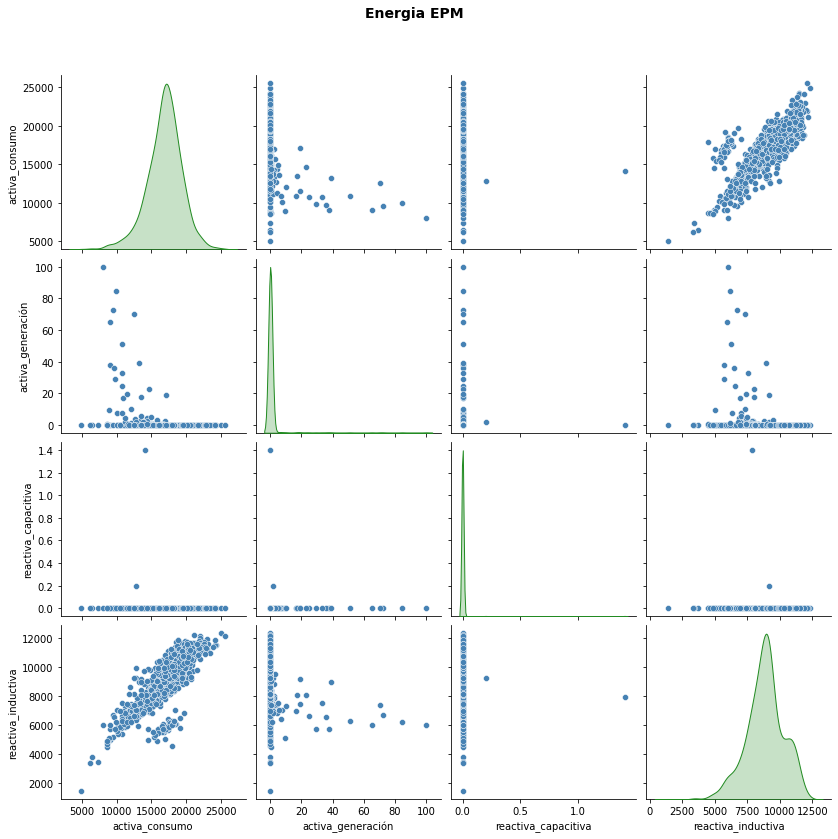

In [229]:
multiple_plot(1, df_reactiva_epm , numCols, None, 'scatterplot', 'Energia EPM',30)

In [161]:
matrizCorr = df_reactiva_epm[numCols].corr()

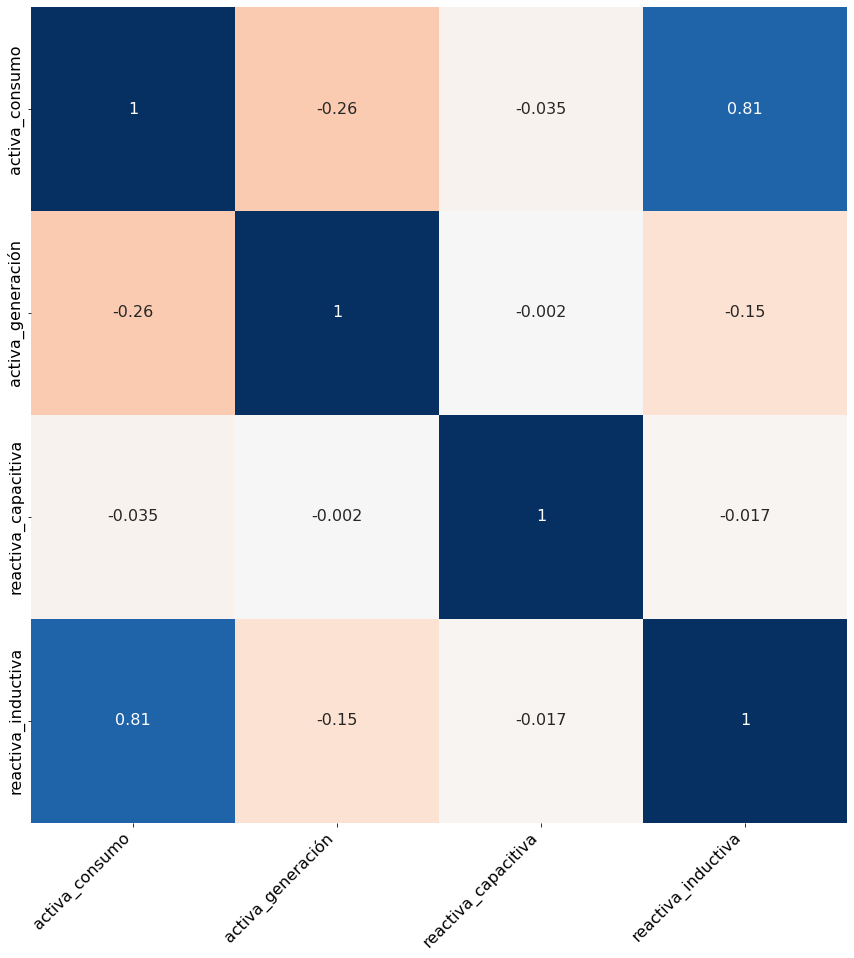

In [228]:
# Mapa de calor (Heatmap) de la matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    matrizCorr,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 16},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 16)

Se puede ver una relación entre las varibles energia_reactiva_inductiva y energia_activa_consumo

/tmp/ipykernel_8236/4020468583.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_reactiva_epm['activa_consumo'])
/tmp/ipykernel_8236/4020468583.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_reactiva_epm['activa_consumo'], palette='nipy_spectral')
/tmp/ipykernel_8236/4020468583.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `

Text(0.5, 0.98, 'Energía EPM')

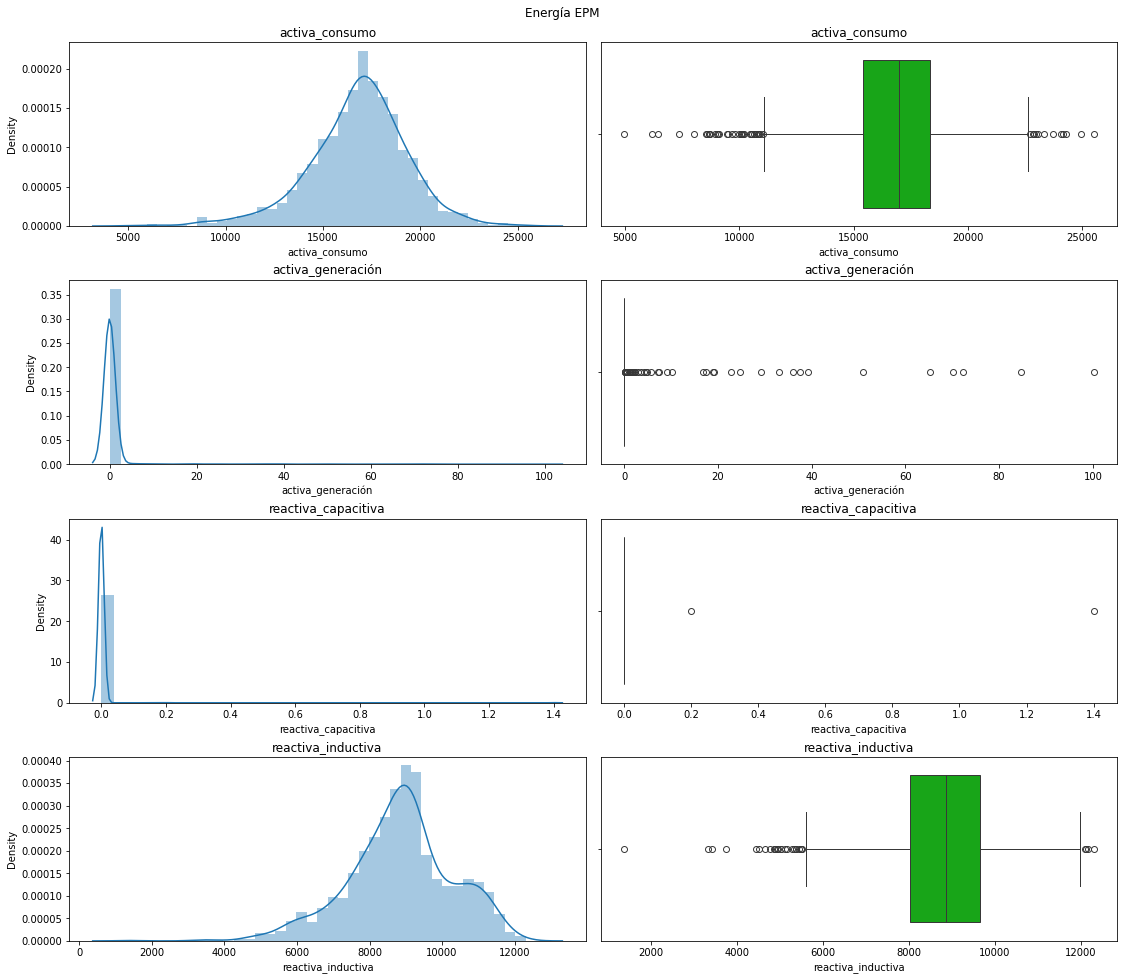

In [177]:
#
fig = plt.figure(figsize=(15.5, 13.5), layout="constrained")
spec = fig.add_gridspec(ncols=2, nrows=4)

ax0 = fig.add_subplot(spec[0, 0])
plt.title('activa_consumo')
sns.distplot(df_reactiva_epm['activa_consumo'])

ax1 = fig.add_subplot(spec[0, 1])
plt.title('activa_consumo')
sns.boxplot(x=df_reactiva_epm['activa_consumo'], palette='nipy_spectral')

ax2 = fig.add_subplot(spec[1, 0])
plt.title('activa_generación')
sns.distplot(df_reactiva_epm['activa_generación'])

ax3 = fig.add_subplot(spec[1, 1])
plt.title('activa_generación')
sns.boxplot(x=df_reactiva_epm['activa_generación'], palette='nipy_spectral')

ax4 = fig.add_subplot(spec[2, 0])
plt.title('reactiva_capacitiva')
sns.distplot(df_reactiva_epm['reactiva_capacitiva'])

ax5 = fig.add_subplot(spec[2, 1])
plt.title('reactiva_capacitiva')
sns.boxplot(x=df_reactiva_epm['reactiva_capacitiva'], palette='nipy_spectral')


ax6 = fig.add_subplot(spec[3, 0])
plt.title('reactiva_inductiva')
sns.distplot(df_reactiva_epm['reactiva_inductiva'])

ax7 = fig.add_subplot(spec[3, 1])
plt.title('reactiva_inductiva')
sns.boxplot(x=df_reactiva_epm['reactiva_inductiva'], palette='nipy_spectral')


fig.suptitle('Energía EPM')

### Datos atipicos


In [217]:
#Calculo de valores atípicos 
"""
activa_consumo
activa_generación
reactiva_capacitiva
reactiva_inductiva
"""
def atipicos(column, df):
    #Calculo de Q1 t Q3
    Q1 = np.percentile(column, 25, interpolation = 'midpoint')
    Q3 = np.percentile(column, 75, interpolation = 'midpoint')
    #Cálculo del rango intercuartil
    IQR = Q3 - Q1
    #Cálculo de valor mínimo y máximo para los valores atípicos
    VAInf = Q1 - 1.5*IQR
    VASup = Q3 + 1.5*IQR
    cantidad_atipicos_sup = df[column>VASup]
    cantidad_atipicos_inf = df[column<VAInf]
    cantidad_atipicos = len(cantidad_atipicos_sup) +len(cantidad_atipicos_inf)
    return cantidad_atipicos,VAInf, VASup
           
atp_activa_consumo = atipicos(df_reactiva_epm["activa_consumo"],df_reactiva_epm)
atp_activa_generación = atipicos(df_reactiva_epm["activa_generación"],df_reactiva_epm)
atp_reactiva_capacitiva = atipicos(df_reactiva_epm["reactiva_capacitiva"],df_reactiva_epm)
atp_reactiva_inductiva = atipicos(df_reactiva_epm["reactiva_inductiva"],df_reactiva_epm)

print(f'Valores atípicos de activa_consumo (cantidad, inf, sup): {atp_activa_consumo}')
print(f'Valores atípicos de activa_generación (cantidad, inf, sup): {atp_activa_generación}')
print(f'Valores atípicos de reactiva_capacitiva (cantidad, inf, sup): {atp_reactiva_capacitiva}')
print(f'Valores atípicos de reactiva_inductiva (cantidad, inf, sup): {atp_reactiva_inductiva}')

Valores atípicos de activa_consumo (cantidad, inf, sup): (46, 11064.0, 22712.0)
Valores atípicos de activa_generación (cantidad, inf, sup): (48, 0.0, 0.0)
Valores atípicos de reactiva_capacitiva (cantidad, inf, sup): (2, 0.0, 0.0)
Valores atípicos de reactiva_inductiva (cantidad, inf, sup): (29, 5594.0, 12106.0)


/tmp/ipykernel_8236/3377457317.py:22: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  atp_activa_consumo = atipicos(df_reactiva_epm["activa_consumo"],df_reactiva_epm)
/tmp/ipykernel_8236/3377457317.py:23: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  atp_activa_generación = atipicos(df_reactiva_epm["activa_generación"],df_reactiva_epm)
/tmp/ipykernel_8236/3377457317.py:24: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to revie


Variables para calcular valores atípicos

$Q1 = \text{ perceptil 25 }\\$
$Q2 = \text{ perceptil 75 } \\$
$IQR = Q3 - Q1 $
$$
    VAInf = Q1 - 1.5*IQR,\\
    VASup = Q3 + 1.5*IQR
$$


Resumen de valores atípicos

| Columna | Cantidad | Valor infimo | Valor supremo |
|:---  |:--- |:---|:---|
| activa_consumo | 46 | 11064.0 | 22712.0 |
| activa_generación | 48 | 0.0 | 0.0 |
| reactiva_capacitiva |2 | 0.0 | 0.0 |
| reactiva_inductiva | 29 | 5594.0 | 12106.0 |


In [165]:
# Datos atipicos
cantidad_atipicos = df_reactiva_epm[df_reactiva_epm['reactiva_inductiva']>VASup]
print(f'La cantidad de datos atípicos a eliminar son: {cantidad_atipicos}')

#data = data.drop(data[data['Concrete compressive strength']>VASup].index)

#Reiniciar el indice
#data.reset_index(drop=True, inplace=True)

La cantidad de datos atípicos a eliminar son:      activa_consumo  activa_generación  reactiva_capacitiva  \
127         21936.0                0.0                  0.0   
59          24944.0                0.0                  0.0   
62          21136.0                0.0                  0.0   
85          25520.0                0.0                  0.0   

     reactiva_inductiva       date  
127             12112.0 2023-10-06  
59              12304.0 2024-02-29  
62              12176.0 2024-03-03  
85              12120.0 2024-03-26  


### Limpieza de datos proveniente de los sensores

### 

In [166]:
df_iot_power_meters.head()

,equipo,ts,corriente_a,corriente_b,corriente_c,corriente_media,distorsion_media_total,energia_activa,energia_aparente,energia_reactiva,factor_potencia,potencia_activa,potencia_aparente,potencia_reactiva,tension_media,voltaje_ab,voltaje_bc,voltaje_ca
0,pm-2000kva,2023-10-10T18:52:47.919087,23.0,25.9,23.5,24.2,159.9,240566.4,358203.8,260980.9,1.2,16.6,20.2,'-11.5,482.8,483.8,483.3,481.5
1,pm-2000kva,2023-10-10T18:52:48.918342,23.4,26.4,23.9,25.0,160.0,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.1,482.9,483.8,483.3,481.5
2,pm-2000kva,2023-10-10T18:52:49.918697,23.4,26.3,23.6,24.5,159.7,240566.4,358203.8,260980.9,1.2,16.6,20.5,'-12,482.8,483.7,483.3,481.4
3,pm-2000kva,2023-10-10T18:52:50.918346,24.0,27.0,24.4,25.1,159.8,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.2,482.8,483.7,483.2,481.4
4,pm-2000kva,2023-10-10T18:52:51.918629,23.0,26.0,23.5,24.1,159.7,240566.4,358203.8,260980.9,1.2,16.5,20.2,'-11.6,482.7,483.6,483.2,481.4


In [167]:
# Cambiando el tipo de dato de cada columna a su correspondiente tipo
for df_ in  [df_iot_calderas, df_iot_esterilizadores, df_iot_pasteurizadores, df_iot_power_meters, df_iot_silos, df_iot_yogurteras]:
    for column_id in range(len(df_.columns)):
        name_columns = df_.columns[column_id]
        if column_id == 1:
            df_[name_columns] = convert_to_datetime(df_[name_columns])
        elif column_id == 0:
            df_[name_columns] = df_[name_columns].astype(str)
        elif column_id == 13:
            df_[name_columns] = df_[name_columns].astype(str)            
        else :
            df_[name_columns] = pd.to_numeric(df_[name_columns], errors='coerce')

In [168]:
df_iot_power_meters.head()

,equipo,ts,corriente_a,corriente_b,corriente_c,corriente_media,distorsion_media_total,energia_activa,energia_aparente,energia_reactiva,factor_potencia,potencia_activa,potencia_aparente,potencia_reactiva,tension_media,voltaje_ab,voltaje_bc,voltaje_ca
0,pm-2000kva,2023-10-10 18:52:47.919087,23.0,25.9,23.5,24.2,159.9,240566.4,358203.8,260980.9,1.2,16.6,20.2,'-11.5,482.8,483.8,483.3,481.5
1,pm-2000kva,2023-10-10 18:52:48.918342,23.4,26.4,23.9,25.0,160.0,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.1,482.9,483.8,483.3,481.5
2,pm-2000kva,2023-10-10 18:52:49.918697,23.4,26.3,23.6,24.5,159.7,240566.4,358203.8,260980.9,1.2,16.6,20.5,'-12,482.8,483.7,483.3,481.4
3,pm-2000kva,2023-10-10 18:52:50.918346,24.0,27.0,24.4,25.1,159.8,240566.4,358203.8,260980.9,1.2,17.1,21.0,'-12.2,482.8,483.7,483.2,481.4
4,pm-2000kva,2023-10-10 18:52:51.918629,23.0,26.0,23.5,24.1,159.7,240566.4,358203.8,260980.9,1.2,16.5,20.2,'-11.6,482.7,483.6,483.2,481.4


In [169]:
df_iot_power_meters.info()
df_iot_power_meters.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   equipo                  50 non-null     object        
 1   ts                      50 non-null     datetime64[ns]
 2   corriente_a             50 non-null     float64       
 3   corriente_b             50 non-null     float64       
 4   corriente_c             50 non-null     float64       
 5   corriente_media         50 non-null     float64       
 6   distorsion_media_total  50 non-null     float64       
 7   energia_activa          50 non-null     float64       
 8   energia_aparente        50 non-null     float64       
 9   energia_reactiva        50 non-null     float64       
 10  factor_potencia         50 non-null     float64       
 11  potencia_activa         50 non-null     float64       
 12  potencia_aparente       50 non-null     float64     

,ts,corriente_a,corriente_b,corriente_c,corriente_media,distorsion_media_total,energia_activa,energia_aparente,energia_reactiva,factor_potencia,potencia_activa,potencia_aparente,tension_media,voltaje_ab,voltaje_bc,voltaje_ca
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,5.000000e+01,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2023-10-10 18:53:13.714603008,23.524000,26.530000,23.986000,24.728000,159.130000,240566.496000,358203.938000,260980.9,1.200000e+00,16.834000,20.698000,482.67000,483.570000,483.074000,481.340000
min,2023-10-10 18:52:47.919087,22.900000,25.900000,23.500000,24.100000,157.000000,240566.400000,358203.800000,260980.9,1.200000e+00,16.400000,20.200000,482.30000,483.100000,482.600000,481.000000
25%,2023-10-10 18:53:00.193612544,23.200000,26.200000,23.700000,24.500000,158.350000,240566.400000,358203.900000,260980.9,1.200000e+00,16.525000,20.500000,482.50000,483.500000,483.000000,481.200000
50%,2023-10-10 18:53:13.419066624,23.450000,26.500000,23.950000,24.700000,159.400000,240566.500000,358203.900000,260980.9,1.200000e+00,16.800000,20.700000,482.70000,483.600000,483.100000,481.400000
75%,2023-10-10 18:53:27.668234240,23.900000,26.875000,24.300000,25.000000,159.700000,240566.600000,358204.000000,260980.9,1.200000e+00,17.100000,20.900000,482.80000,483.700000,483.200000,481.500000
max,2023-10-10 18:53:39.951809,24.100000,27.200000,24.500000,25.300000,160.400000,240566.600000,358204.100000,260980.9,1.200000e+00,17.300000,21.100000,483.00000,483.800000,483.300000,481.700000
std,NaN,0.362846,0.386111,0.325771,0.337482,0.836721,0.078142,0.102798,0.0,2.242989e-16,0.298028,0.283196,0.18979,0.198206,0.187148,0.190595


In [170]:
df_iot_power_meters["potencia_reactiva"]

0     '-11.5
1     '-12.1
2       '-12
3     '-12.2
4     '-11.6
5       '-12
6     '-12.7
7     '-12.1
8     '-11.9
9     '-11.5
10    '-12.6
11    '-11.2
12    '-11.8
13      '-12
14    '-12.4
15    '-11.3
16    '-12.6
17    '-12.2
18    '-11.5
19    '-12.6
20    '-11.7
21    '-12.1
22    '-11.6
23    '-12.3
24    '-11.9
25    '-11.9
26    '-12.2
27      '-12
28    '-11.5
29      '-12
30    '-12.5
31    '-12.2
32      '-12
33    '-12.2
34    '-11.2
35    '-11.8
36    '-11.9
37    '-11.5
38    '-12.7
39    '-12.2
40    '-11.8
41    '-11.9
42    '-11.8
43      '-13
44    '-11.9
45    '-11.9
46    '-12.2
47    '-11.9
48    '-12.3
49    '-12.2
Name: potencia_reactiva, dtype: object

In [171]:
numCols_power_meters = df_iot_power_meters.select_dtypes(include = ['float64']).columns.tolist()
print(len(numCols_power_meters))
df_iot_power_meters[numCols_power_meters].head()

15


,corriente_a,corriente_b,corriente_c,corriente_media,distorsion_media_total,energia_activa,energia_aparente,energia_reactiva,factor_potencia,potencia_activa,potencia_aparente,tension_media,voltaje_ab,voltaje_bc,voltaje_ca
0,23.0,25.9,23.5,24.2,159.9,240566.4,358203.8,260980.9,1.2,16.6,20.2,482.8,483.8,483.3,481.5
1,23.4,26.4,23.9,25.0,160.0,240566.4,358203.8,260980.9,1.2,17.1,21.0,482.9,483.8,483.3,481.5
2,23.4,26.3,23.6,24.5,159.7,240566.4,358203.8,260980.9,1.2,16.6,20.5,482.8,483.7,483.3,481.4
3,24.0,27.0,24.4,25.1,159.8,240566.4,358203.8,260980.9,1.2,17.1,21.0,482.8,483.7,483.2,481.4
4,23.0,26.0,23.5,24.1,159.7,240566.4,358203.8,260980.9,1.2,16.5,20.2,482.7,483.6,483.2,481.4


/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/javier/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:1513: UserW

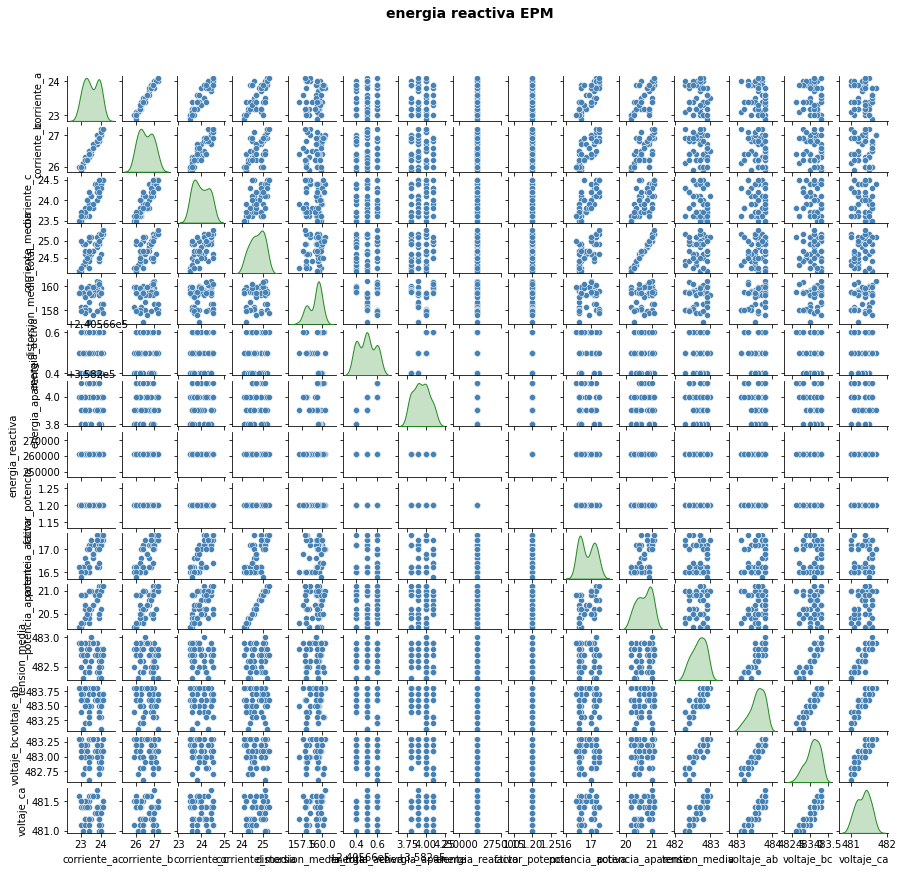

In [172]:
multiple_plot(5, df_iot_power_meters , numCols_power_meters, None, 'scatterplot', 'energia reactiva EPM',30)

matrizCorr_power_meters = df_iot_power_meters[numCols_power_meters].corr()

<Axes: >

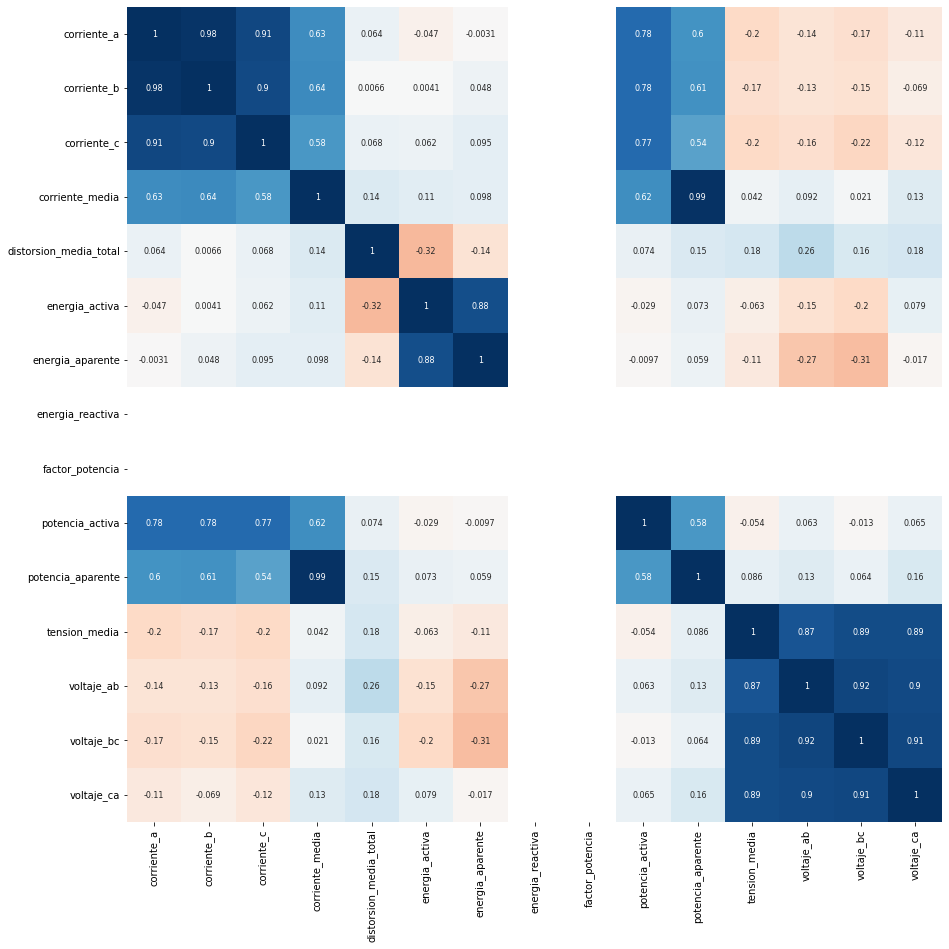

In [173]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    matrizCorr_power_meters,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = 'RdBu', #sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
